In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
# Load the dataset
invDf = pd.read_parquet('inventory.parquet', engine='pyarrow')
prodDf = pd.read_parquet('products.parquet', engine='pyarrow')
transDf = pd.read_parquet('transactions.parquet', engine='pyarrow')

In [5]:
def get_dataset_info(dataset):
  return dataset.info()

for info in [invDf,transDf,prodDf]:
  print(f"{get_dataset_info(info)}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53315 entries, 0 to 53314
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  53315 non-null  int64
 1   color       53315 non-null  int64
 2   week        53315 non-null  int64
 3   year        53315 non-null  int64
 4   end_stock   53315 non-null  int64
dtypes: int64(5)
memory usage: 2.0 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219274 entries, 0 to 1219273
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   transaction_id  1219274 non-null  int64  
 1   date            1219274 non-null  object 
 2   shop            1219274 non-null  int64  
 3   product_id      1219274 non-null  int64  
 4   quantity        1219274 non-null  int64  
 5   price           1219274 non-null  float64
 6   price_paid      1219274 non-null  float64
 7   purchase_price  1219274 non-null  f

In [6]:
# Convertig date to date time object
transDf['date'] = pd.to_datetime(transDf.date)

In [7]:
# checking for NaN values in our datasets
def checkNan(dataset):
    """A method to check for NaN values in our datasets

    Args:
        dataset (DataFrame): dataset to check for NaN values

    Returns:
        boolean: Returns boolean value if NaN values are found returns True otherwise False
    """
    return dataset.isnull().values.any()

list(map(lambda x: checkNan(x), [invDf,transDf,prodDf])) # we can see all the data present in the dataset(s) does not have any NaN values

[False, False, False]

In [8]:
def convert_to_flaot(dataset):
    """A method to downcast all the values to float64 long variables except date object.

    Args:
        dataset (DataFrame): dataset to convert the colums into float64 values

    Returns:
        DataFrame: Converted dataframe
    """
    for col in dataset.columns:
        if col != 'date' and col != 'year':
            dataset[col] = dataset[col].astype('float64')
    return dataset
    
invDf,transDf,prodDf = (map(lambda x: convert_to_flaot(x), [invDf,transDf,prodDf]))

In [9]:
# Check the values of our dataset(s)
transDf.head(3)

,transaction_id,date,shop,product_id,quantity,price,price_paid,purchase_price
0,-4.105354e+18,2018-06-27,3.467809e+18,7.525294e+18,-1.0,-61.969,-54.777,13.764
1,-8.459771e+18,2018-12-08,7.882037e+18,-1.087308e+18,1.0,105.369,105.369,21.111
2,3.140884e+18,2018-06-25,6.203040e+17,4.635203e+18,1.0,124.000,124.000,2.511


In [10]:
invDf.head(3)

,product_id,color,week,year,end_stock
0,5.013503e+18,2.836256e+17,26.0,2018,467.0
1,5.013503e+18,2.836256e+17,35.0,2018,83.0
2,5.013503e+18,2.836256e+17,37.0,2018,74.0


In [11]:
prodDf.head(3)

,product_id,color,season,group1,group2,group3,group4,supplier,price
0,-6.621881e+18,-2.483913e+18,-4.346186e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,3.171477e+18,216.845
1,1.419079e+16,4.434393e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845
2,8.497159e+17,-3.276860e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845


### Considering inventory dataset

In [12]:
# Check number of time series and lengths
print("Number of producuts is {}.".format(len(invDf.groupby(["product_id"]).groups.keys())))
print("Number of color is {}.".format(len(invDf.groupby(["color"]).groups.keys())))
print("Number of time series is {}.".format(len(invDf.groupby(["product_id", "color"]).groups.keys())))
print("\nLength distribution of the time series:")
print(invDf.groupby(["product_id", "color"]).size().describe())

Number of producuts is 744.
Number of color is 193.
Number of time series is 1093.

Length distribution of the time series:
count    1093.000000
mean       48.778591
std        29.186222
min         1.000000
25%        24.000000
50%        48.000000
75%        63.000000
max       104.000000
dtype: float64


In [13]:
prod_color_count_df = pd.DataFrame({'count' : invDf.groupby(["product_id", "color"] ).size()}).reset_index()

In [14]:
prod_color_count_df.head(3)

,product_id,color,count
0,-9.205752e+18,-2.120051e+18,2
1,-9.074209e+18,9.836474e+17,22
2,-9.074209e+18,2.585526e+18,22


Text(0.5, 1.0, 'Product count')

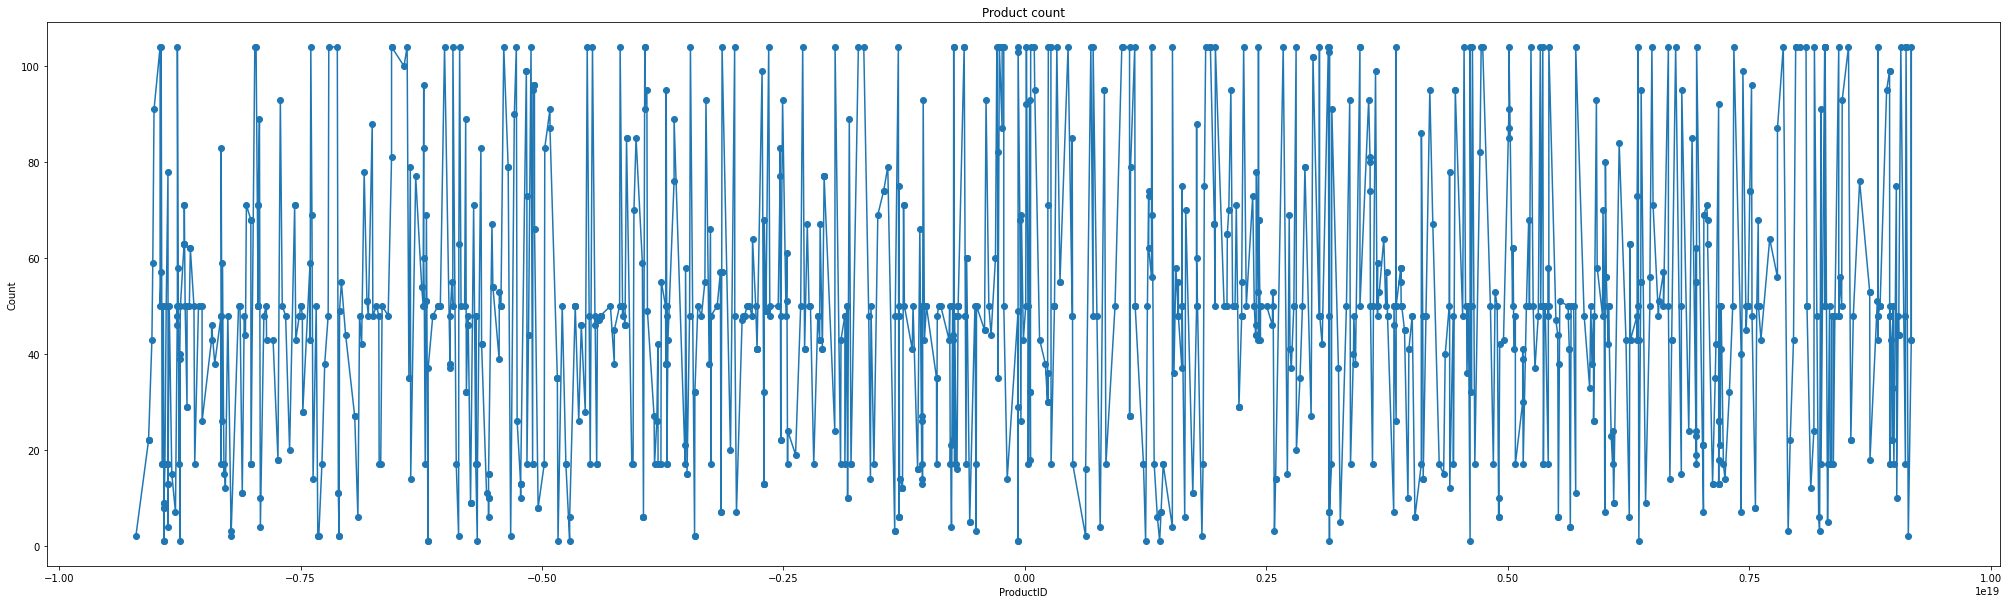

In [15]:
plt.figure(figsize=(35,10))
plt.plot(prod_color_count_df.product_id,prod_color_count_df['count'],marker='o')
plt.xlabel('ProductID')
plt.ylabel('Count')
plt.title('Product count')

In [16]:
prod_endStock_count_df = pd.DataFrame({'count' : invDf.groupby(["product_id", "year"] ).end_stock.size()}).reset_index().sort_values(by=['year'])

In [18]:
prod_endStock_count_df.head(3)

,product_id,year,count
841,6.352318e+18,2018,52
802,5.656741e+18,2018,50
432,-1.052292e+18,2018,52


In [19]:
# To fetch the count of end stock at end of the year
y1,y2 = 0,0
for idx,val in prod_endStock_count_df.iterrows():
    if val['year'] == 2018: y1+= int(val['count'])
    else: y2+= int(val['count'])

Text(0.5, 1.0, 'Total End Stock per year')

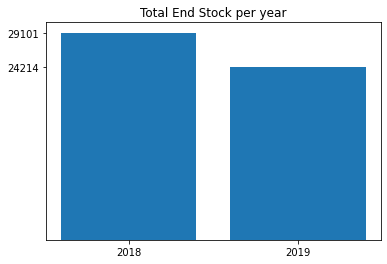

In [20]:
values = [('2018',y1),('2019',y2)]
labels, val = zip(*values)
xs = np.arange(len(labels)) 

plt.bar(xs, val)
plt.xticks(xs, labels)
plt.yticks(val)
plt.title('Total End Stock per year')

### Gather sales based on the season

- To achive this we join two datasets transaction and product datasets

- The join is based on the productID

In [31]:
prodDf

,product_id,color,season,group1,group2,group3,group4,supplier,price
0,-6.621881e+18,-2.483913e+18,-4.346186e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,3.171477e+18,216.845
1,1.419079e+16,4.434393e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845
2,8.497159e+17,-3.276860e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845
3,3.436431e+18,-8.748599e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,-3.148163e+18,123.845
4,3.292933e+18,6.300285e+18,-6.688484e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.570611e+18,123.845
...,...,...,...,...,...,...,...,...,...
3719,5.225623e+18,-2.483913e+18,-8.805101e+18,-1.649647e+18,-4.514815e+18,5.270884e+18,-5.181468e+18,-1.218806e+18,139.345
3720,4.433528e+18,1.727990e+18,-8.805101e+18,-1.649647e+18,-4.514815e+18,5.270884e+18,-5.181468e+18,7.946683e+17,154.845
3721,8.538511e+17,-5.638941e+17,-6.688484e+18,-1.649647e+18,-4.514815e+18,5.270884e+18,-5.181468e+18,5.403235e+18,139.345
3722,8.604137e+18,2.495562e+18,5.248912e+18,3.038650e+18,-8.575993e+18,3.346951e+18,-7.589239e+18,-3.148163e+18,108.345


In [47]:
prodDf.columns.values[-1] = "product_price" # Assuming the price column in the product dataset be product price

In [48]:
prodDf.head(2)

,product_id,color,season,group1,group2,group3,group4,supplier,product_price
0,-6.621881e+18,-2.483913e+18,-4.346186e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,3.171477e+18,216.845
1,1.419079e+16,4.434393e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845


In [32]:
transDf

,transaction_id,date,shop,product_id,quantity,price,price_paid,purchase_price
0,-4.105354e+18,2018-06-27,3.467809e+18,7.525294e+18,-1.0,-61.969,-54.777,13.764
1,-8.459771e+18,2018-12-08,7.882037e+18,-1.087308e+18,1.0,105.369,105.369,21.111
2,3.140884e+18,2018-06-25,6.203040e+17,4.635203e+18,1.0,124.000,124.000,2.511
3,8.293949e+18,2018-05-24,5.882286e+18,3.315728e+17,1.0,37.200,30.318,16.368
4,-3.825516e+17,2019-06-29,3.467809e+18,4.394905e+18,-1.0,-74.400,-74.400,-40.796
...,...,...,...,...,...,...,...,...
1219269,8.207824e+18,2018-05-01,2.584792e+18,-5.838117e+18,1.0,15.500,13.950,46.779
1219270,5.570147e+18,2018-04-29,7.594814e+18,-7.782229e+17,1.0,15.500,15.500,21.390
1219271,3.712099e+18,2018-04-28,6.850805e+18,-7.782229e+17,1.0,15.500,10.850,21.390
1219272,5.773475e+17,2018-04-28,2.584792e+18,-5.838117e+18,1.0,15.500,15.500,46.779


In [50]:
# Merge the dataset based on the product ID
merge_dataset = pd.merge(prodDf,transDf,on='product_id')

In [51]:
merge_dataset.head(3)

,product_id,color,season,group1,group2,group3,group4,supplier,product_price_x,transaction_id,date,shop,quantity,price,price_paid,purchase_price
0,8.138509e+18,1.868465e+17,-3.924446e+17,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-9.092260e+18,154.969,-8.374639e+18,2019-06-24,6.747463e+17,1.0,154.969,154.969,40.362
1,-5.933030e+18,-1.530129e+18,6.484470e+18,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-2.948018e+18,123.969,-6.180864e+18,2019-06-28,-1.704741e+17,1.0,46.500,32.550,35.681
2,-5.933030e+18,-1.530129e+18,6.484470e+18,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-2.948018e+18,123.969,-2.166017e+18,2019-06-28,-7.255919e+18,1.0,46.500,46.500,35.681


In [52]:
# Grouping the transaction id based on shop
trans_count_based_shop = pd.DataFrame({'count' : merge_dataset.groupby(["transaction_id",'shop'] ).shop.size()}).reset_index()

In [53]:
trans_count_based_shop

,transaction_id,shop,count
0,-9.223361e+18,3.467809e+18,2
1,-9.223341e+18,3.467809e+18,2
2,-9.223335e+18,5.557508e+18,2
3,-9.223332e+18,-2.605118e+18,4
4,-9.223301e+18,5.557508e+18,8
...,...,...,...
979763,9.223282e+18,3.467809e+18,1
979764,9.223300e+18,5.557508e+18,1
979765,9.223305e+18,5.557508e+18,3
979766,9.223308e+18,5.557508e+18,3


In [54]:
# From above dataframe we gathered the transaction count based on shop. Here we are cumulating it per shop.
tot_trans_per_shop = pd.DataFrame({'Total' : trans_count_based_shop.groupby('shop')['count'].apply(sum)}).reset_index()

In [55]:
tot_trans_per_shop

,shop,Total
0,-8.626987e+18,10503
1,-8.576863e+18,10044
2,-8.461798e+18,7925
3,-8.405650e+18,1080
4,-8.276772e+18,9151
...,...,...
115,8.110360e+18,10197
116,8.386272e+18,5450
117,8.543104e+18,3736
118,8.887709e+18,9265


In [56]:
# Since we have 120 rows of unique shop, we are encoding it with different labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # Label encoder constructor

In [58]:
# label encoding the shop id since we dont want to display the shop id as float 64 format
tot_trans_per_shop.shop = list(le.fit_transform(tot_trans_per_shop.shop))

In [61]:
class_mapping = dict(zip(le.transform(le.classes_),le.classes_)) # a dict to keep track of all our shops

In [62]:
px.bar(tot_trans_per_shop,x="shop", y="Total",title="Total Transaction per Shop (2018-2019)")

### Shop *__number 95__* makes the best sales with *__923.778k__*

In [67]:
tot_trans_per_shop

,shop,Total
0,0,10503
1,1,10044
2,2,7925
3,3,1080
4,4,9151
...,...,...
115,115,10197
116,116,5450
117,117,3736
118,118,9265


In [88]:
# Fetching top 5 best shops
top_five_shops = pd.DataFrame.from_dict(tot_trans_per_shop.Total.nlargest(5).to_dict(),orient='index',columns=['total'])
top_five_shops['shops'] = top_five_shops.index
top_five_shops

,total,shops
95,923778,95
84,738841,84
32,68804,32
47,48540,47
14,26512,14


Text(0.5, 1.0, 'Top 5 shops sales')

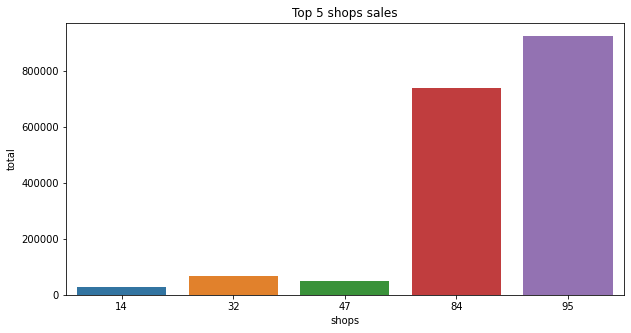

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x="shops", y="total", data=top_five_shops)
plt.title('Top 5 shops sales')

### From the above graph we can say that these shops have a good sales between 2018 and 2019.

In [97]:
merge_dataset.head(2)

,product_id,color,season,group1,group2,group3,group4,supplier,product_price_x,transaction_id,date,shop,quantity,price,price_paid,purchase_price
0,8.138509e+18,1.868465e+17,-3.924446e+17,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-9.092260e+18,154.969,-8.374639e+18,2019-06-24,6.747463e+17,1.0,154.969,154.969,40.362
1,-5.933030e+18,-1.530129e+18,6.484470e+18,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-2.948018e+18,123.969,-6.180864e+18,2019-06-28,-1.704741e+17,1.0,46.500,32.550,35.681


In [99]:
merge_dataset.product_id.nunique()

488

In [103]:
merge_dataset.groupby(['shop','product_id'] ).product_id.count()

shop           product_id   
-8.626987e+18  -9.074209e+18    120
               -9.017388e+18     10
               -8.954581e+18     12
               -8.943598e+18      4
               -8.872920e+18     22
                               ... 
 9.187231e+18   8.984835e+18     12
                8.990690e+18      8
                9.024998e+18     24
                9.048865e+18    108
                9.179841e+18      6
Name: product_id, Length: 33652, dtype: int64

### Yet to fetch the top products based on shops 

In [142]:
# Fetching top product based on the shop with their total count of sales
top_shop_with_prod = pd.DataFrame({'Total' : merge_dataset.groupby(['shop','product_id'] ).product_id.count()}).reset_index()

In [143]:
top_shop_with_prod

,shop,product_id,Total
0,-8.626987e+18,-9.074209e+18,120
1,-8.626987e+18,-9.017388e+18,10
2,-8.626987e+18,-8.954581e+18,12
3,-8.626987e+18,-8.943598e+18,4
4,-8.626987e+18,-8.872920e+18,22
...,...,...,...
33647,9.187231e+18,8.984835e+18,12
33648,9.187231e+18,8.990690e+18,8
33649,9.187231e+18,9.024998e+18,24
33650,9.187231e+18,9.048865e+18,108


In [144]:
top_shop_with_prod.sort_values(by='Total', ascending=False) # Sorting the values to descending to fetch max product with max count in specific shop

,shop,product_id,Total
27074,5.557508e+18,-1.059965e+18,72368
27257,5.557508e+18,7.185386e+18,48734
23692,3.467809e+18,-1.059965e+18,30112
23677,3.467809e+18,-2.078421e+18,29680
27054,5.557508e+18,-2.078421e+18,29328
...,...,...,...
19538,1.154437e+18,-5.801285e+18,1
16395,-6.353943e+17,3.610258e+18,1
2411,-7.569122e+18,-5.139475e+18,1
26454,5.339332e+18,2.112264e+18,1


In [125]:
shop_mapping = list(map(lambda x: class_mapping[x],top_five_shops.shops.tolist()))

In [141]:
top_prduct_dataset = pd.DataFrame()

In [145]:
for shop_lst in shop_mapping:
  top_prduct_dataset = pd.concat([top_prduct_dataset,top_shop_with_prod[top_shop_with_prod.shop == shop_lst]])

In [146]:
top_prduct_dataset # Top produt based on shop

,shop,product_id,Total
26900,5.557508e+18,-9.074209e+18,10020
26901,5.557508e+18,-9.017388e+18,744
26902,5.557508e+18,-8.954581e+18,1792
26903,5.557508e+18,-8.943598e+18,642
26904,5.557508e+18,-8.872920e+18,1195
...,...,...,...
4261,-7.255919e+18,8.972050e+18,48
4262,-7.255919e+18,8.984835e+18,40
4263,-7.255919e+18,8.990690e+18,24
4264,-7.255919e+18,9.024998e+18,42


In [148]:
top_prdt = top_prduct_dataset.loc[top_prduct_dataset.groupby('shop')['Total'].idxmax()]

In [149]:
top_prdt # for top 5 shop we got the top 5 product sales

,shop,product_id,Total
4072,-7.255919e+18,-1.059965e+18,2704
9429,-3.887731e+18,7.185386e+18,17584
13636,-1.930217e+18,-1.059965e+18,12032
23692,3.467809e+18,-1.059965e+18,30112
27074,5.557508e+18,-1.059965e+18,72368


In [157]:
top_prdt.shop = le.fit_transform(top_prdt.shop)

Text(0.5, 1.0, 'Top 5 product sales for top 5 shops')

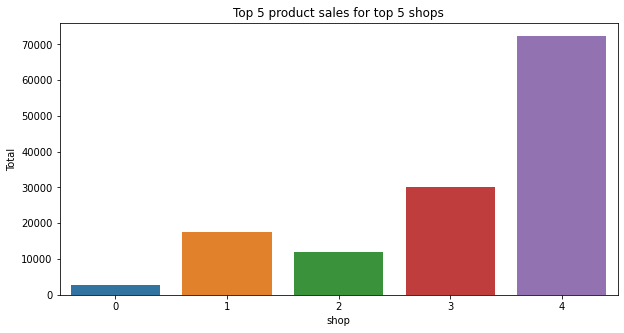

In [160]:
plt.figure(figsize=(10,5))
sns.barplot(x="shop", y="Total" ,data=top_prdt)
plt.title('Top 5 product sales for top 5 shops')

### Fetching top prodcuts based on the season

In [166]:
merge_dataset.groupby(['season','product_id'] ).product_id.count()

season         product_id   
-6.760223e+18  -2.143490e+18        2
                1.396243e+18        2
                1.589666e+18       12
-6.102843e+18  -9.074209e+18    26685
               -8.833517e+18     1708
                                ...  
 6.484470e+18   7.622760e+18     2776
                8.749152e+18     8898
                8.827991e+18     2826
                8.972050e+18     3243
                9.048865e+18    27255
Name: product_id, Length: 488, dtype: int64

In [167]:
top_prod_season = pd.DataFrame({'Total' : merge_dataset.groupby(['season','product_id'] ).product_id.count()}).reset_index()

In [168]:
top_prod_season

,season,product_id,Total
0,-6.760223e+18,-2.143490e+18,2
1,-6.760223e+18,1.396243e+18,2
2,-6.760223e+18,1.589666e+18,12
3,-6.102843e+18,-9.074209e+18,26685
4,-6.102843e+18,-8.833517e+18,1708
...,...,...,...
483,6.484470e+18,7.622760e+18,2776
484,6.484470e+18,8.749152e+18,8898
485,6.484470e+18,8.827991e+18,2826
486,6.484470e+18,8.972050e+18,3243


In [190]:
seasons_dict = dict()
for seas in top_prod_season.season.unique().tolist():
  if seas not in seasons_dict:
    seasons_dict[seas] = 0

In [171]:

for idx,val in top_prod_season.iterrows():
  if val['season'] in seasons_dict:
    max_prd = val['product_id']
    

0 season       -6.760223e+18
product_id   -2.143490e+18
Total         2.000000e+00
Name: 0, dtype: float64
1 season       -6.760223e+18
product_id    1.396243e+18
Total         2.000000e+00
Name: 1, dtype: float64
2 season       -6.760223e+18
product_id    1.589666e+18
Total         1.200000e+01
Name: 2, dtype: float64
3 season       -6.102843e+18
product_id   -9.074209e+18
Total         2.668500e+04
Name: 3, dtype: float64
4 season       -6.102843e+18
product_id   -8.833517e+18
Total         1.708000e+03
Name: 4, dtype: float64
5 season       -6.102843e+18
product_id   -8.675877e+18
Total         1.241000e+04
Name: 5, dtype: float64
6 season       -6.102843e+18
product_id   -8.311982e+18
Total         1.592000e+03
Name: 6, dtype: float64
7 season       -6.102843e+18
product_id   -8.293070e+18
Total         1.412000e+03
Name: 7, dtype: float64
8 season       -6.102843e+18
product_id   -8.278339e+18
Total         9.750000e+02
Name: 8, dtype: float64
9 season       -6.102843e+18
product_